In [1]:
# this is an example file for the automatic resonator detection as part of a Bachelor's thesis in 2023/2024

In [2]:
from qiclib.hardware.vna import VNA
from qiclib.measurement.resonators import *
from qiclib.packages.servicehub import Connection

In [3]:
# set start, stop, step
frequency_start = 0
frequency_stop = 200e6
frequency_step = 40e3

In [4]:
# specify the number of resonances in your file. Make sure this is correct to avoid faulty results
n = 4

sample_number = 21

In [5]:
# set up vna connection via FPGA
conn = Connection(ip="slot3-platform")
vna = VNA(conn)

Establishing gRPC connection to slot3-platform:50058...


In [6]:
# configuration
config = ResonatorsConfig(
    vna
)  # + more options: defaults that do not have to be changed
# config.set_frequency_range(frequency_start, frequency_stop, frequency_step)
config.use_sample_data(sample_number)

using sample option: 21


In [7]:
# run the detection
find = FindResonators(config)
my_resonators = find.find_n_resonators(n)

Resonator detection complete. Number of data points: 4001
Resonators found at frequencies (decreasing prominence):
(1) 9416.39 MHz
(2) 9422.56 MHz
(3) 9423.65 MHz
(4) 9415.15 MHz
In case of false negatives, be sure to enter the correct number of resonators.


In [8]:
# save the result for later
# filepath = "/home/eschubert/gitRepo/ba_peakdetector/tsvFiles"
# my_resonators.save(filepath)
# my_resonators.save_data(filepath)

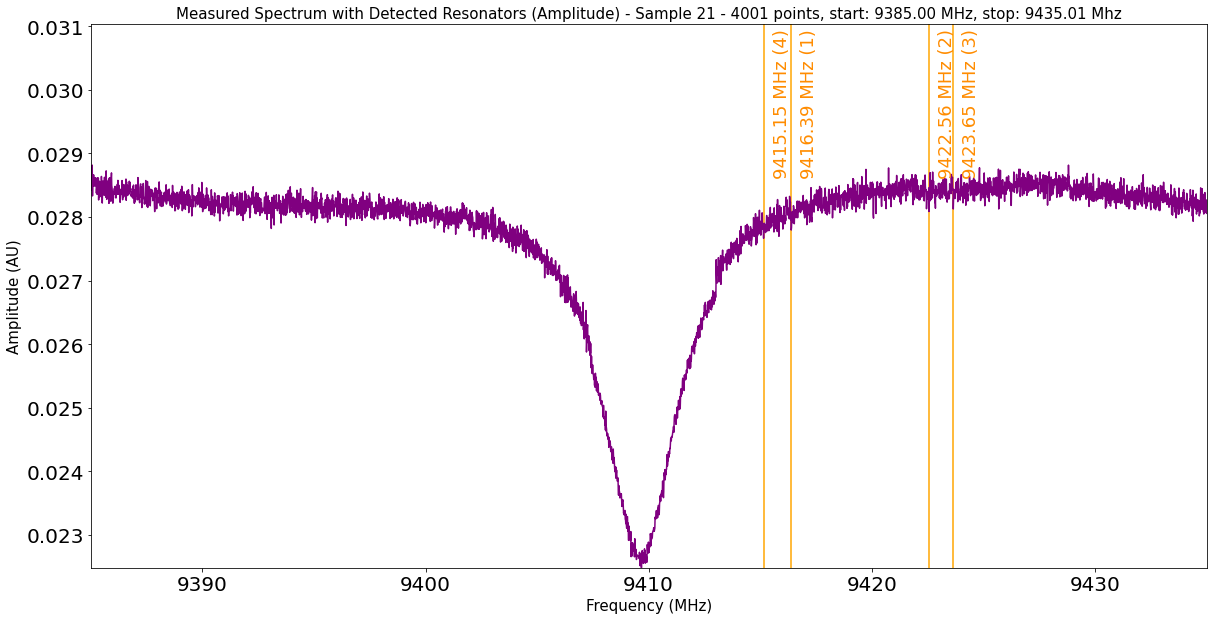

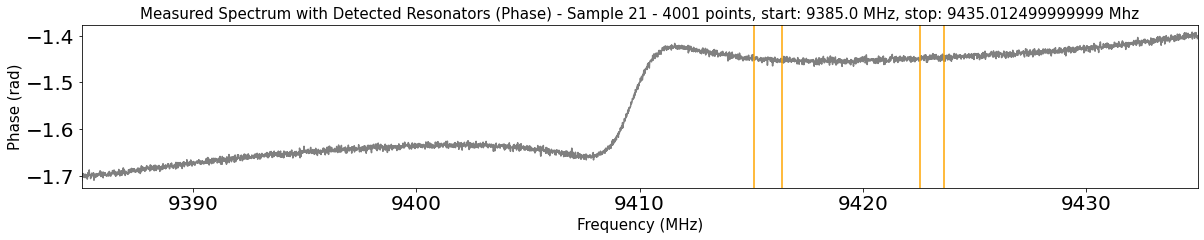

In [9]:
# display the results
my_resonators.display()

In [10]:
# more options:
# my_resonators.display_single_resonator(1)
# my_resonators.display_iq_plane()

Approx. loaded Q-factors for detected resonators by Lorentzian fit using window of 20.0 Mhz:
Resonator (1) at 9420.421 MHz :    Q = 813.39
Resonator (2) at 9415.712 MHz :    Q = 332.25
Resonator (3) at 9417.696 MHz :    Q = 254.46
Resonator (4) at 9415.206 MHz :    Q = 9612.02
For relative measurements, consider setting the center frequency in configuration for accurate results.
Call visualize_qfactor(index) to visualize the fitting for a resonator.


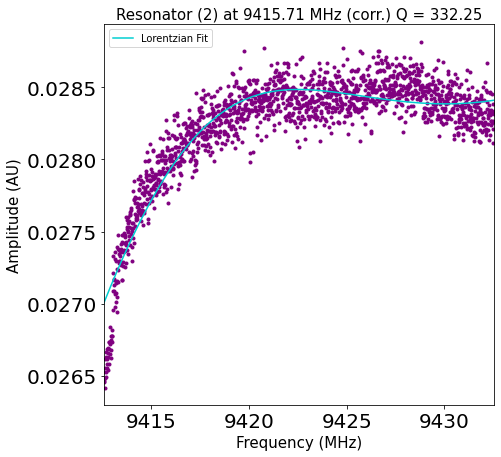

In [11]:
# get the qfactors
my_qfactors = my_resonators.get_qfactors()
my_qfactors.display(2)